# Classifying Yelp Reviews Project (NLP)

In this project we will classify Yelp Reviews into 1 star or 5 star categories based on the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
import nltk
import pandas as pd
import numpy as np

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp=pd.read_csv("yelp.csv")

__Checking the head, info , and describe methods on yelp.__

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp["text length"]=yelp["text"].apply(len)

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [8]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text length'],
      dtype='object')

## Exploratory Data Analysis

Let's explore the data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

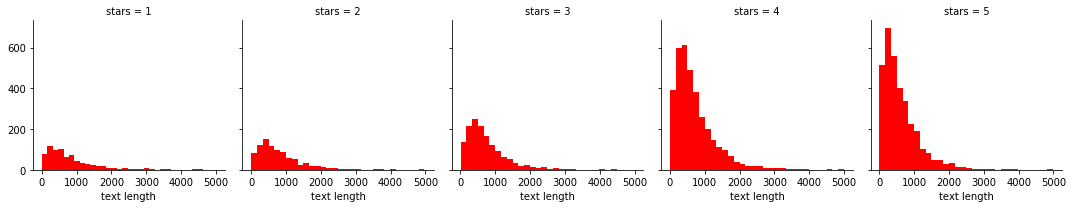

In [10]:
g=sns.FacetGrid(yelp, col="stars")
g=g.map(plt.hist, "text length", color="r", bins=30)

**Creating a boxplot of text length for each star category.**

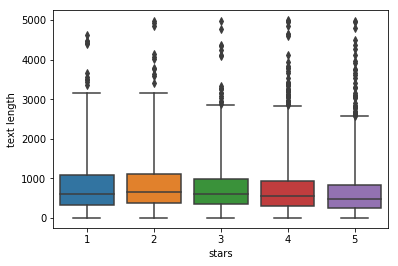

In [11]:
sns.boxplot(data=yelp, x="stars", y="text length", whis=3)

**Creating a countplot of the number of occurrences for each type of star rating.**

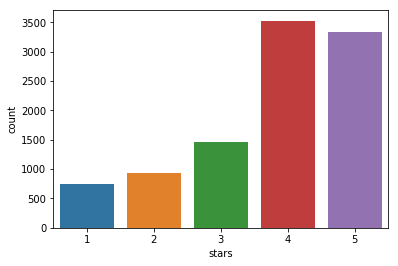

In [12]:
sns.countplot(x="stars", data=yelp)

**Using groupby to get the mean values of the numerical columns**

In [13]:
yelp.groupby("stars").mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [14]:
yelp[["cool", "useful", "funny", "text length"]].corr()

,cool,useful,funny,text length
cool,1.000000,0.887102,0.764342,0.241451
useful,0.887102,1.000000,0.723406,0.293975
funny,0.764342,0.723406,1.000000,0.251760
text length,0.241451,0.293975,0.251760,1.000000


## NLP Classification Task

Let's move on to the actual task. First we will only grab reviews that were either 1 star or 5 stars to make life a bit easier.

**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [15]:
yelp_class=pd.concat([yelp[(yelp["stars"]==1)],yelp[(yelp["stars"]==5)]],axis=0)

**Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [16]:
X=yelp_class["text"]
y=yelp_class["stars"]

**Import CountVectorizer and create a CountVectorizer object.**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

**Using the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). We will save this result by overwriting X.**

In [18]:
X=CountVectorizer().fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

**Using train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

**Import MultinomialNB and create an instance of the estimator and call is nb**

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

**Now fit nb using the training data.**

In [22]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [23]:
predictions=nb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

**Creating a confusion matrix and classification report using these predictions and y_test**

In [25]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[159  70]
 [ 16 981]]


              precision    recall  f1-score   support

           1       0.91      0.69      0.79       229
           5       0.93      0.98      0.96       997

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.92      0.84      0.87      1226
weighted avg       0.93      0.93      0.93      1226



Model works fine!